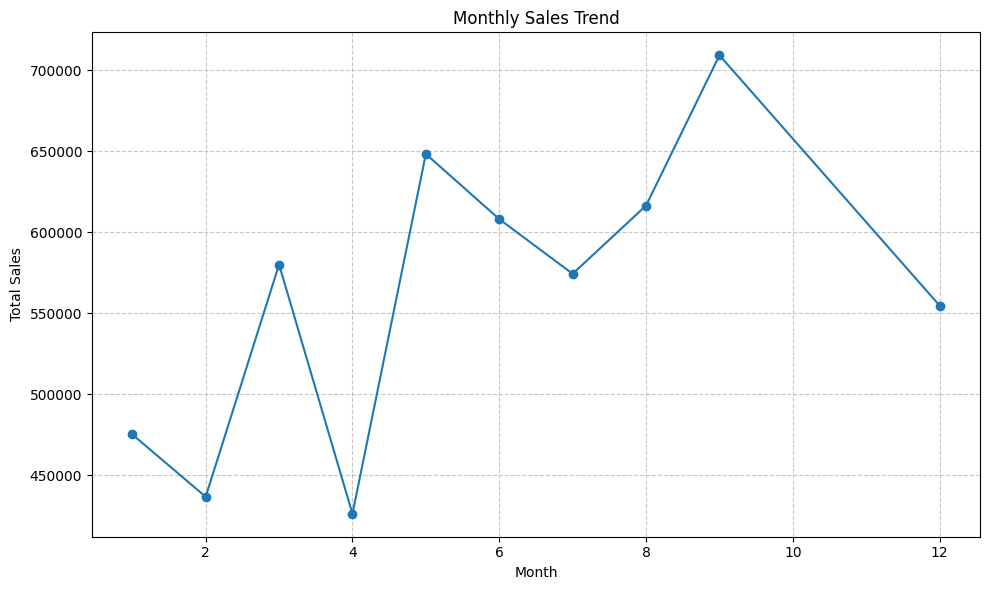

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("retail.csv")

# cleaning the data

data.dropna(subset=['CustomerID'], inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'])

# Total prices

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Analysis 

# sales by month

data['Month'] = data['InvoiceDate'].dt.month
sales_by_month = data.groupby('Month')['TotalPrice'].sum()

# Top 5 product by sales

top_products = data.groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False).head(5)

# Sales by country

sales_by_country = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Visualization

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


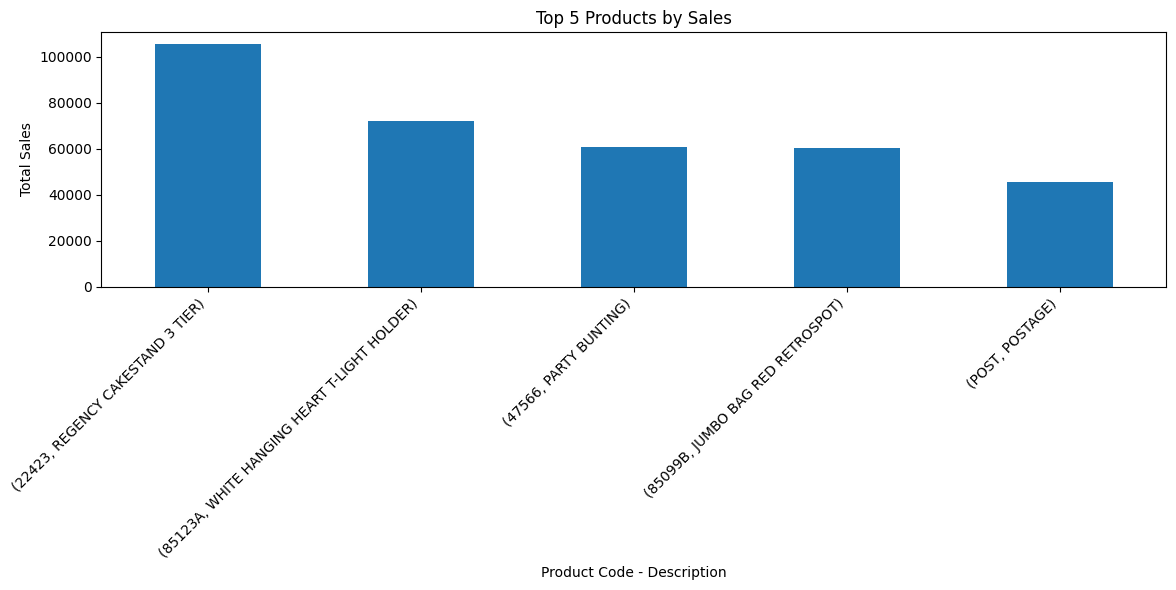

In [33]:
#  Top Products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product Code - Description')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_products.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()

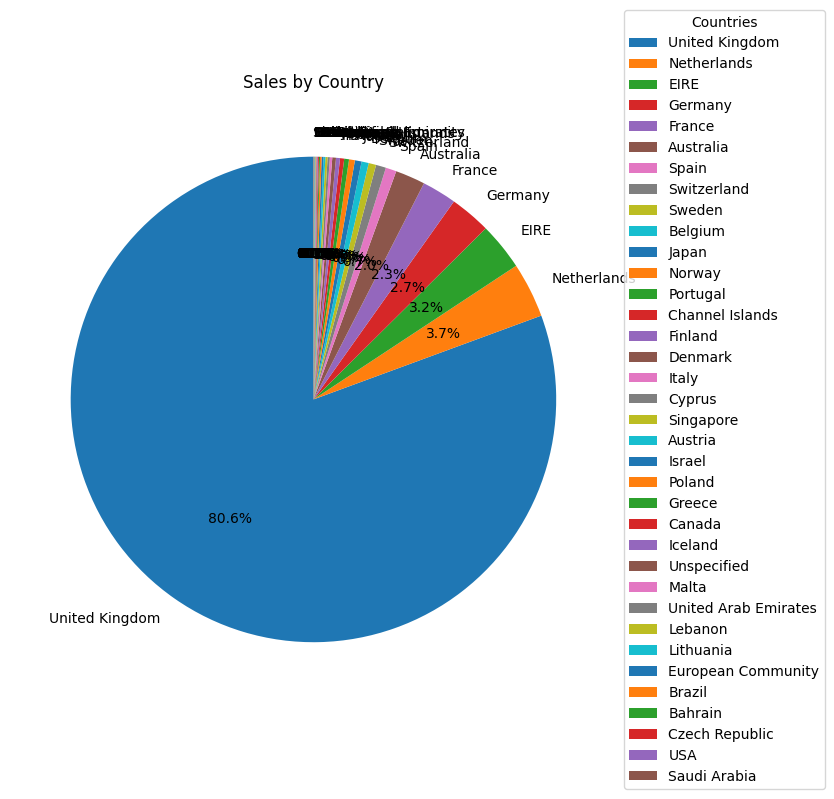

In [34]:
# Sales by Country
plt.figure(figsize=(10, 8))
plt.pie(sales_by_country, 
        labels=sales_by_country.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Sales by Country')
plt.legend(sales_by_country.index,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('sales_by_country.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()